# While loops

The mindkiller of loops.

Read while loops as:

    1) While this condition isn't met...
    2) Do this stuff...
    
So these require more setup and design than for loops, which are easy but kind of dumb.  `while` loops are valuable for when you don't know exactly how long something needs to take or where stuff is.  

Let's play with a copy of The Raven

# Example 1:  Determine the Pre-Raven and Post-Raven eras

In the text of the raven, the bird doesn't appear until roughly halfway through the text.  Until then the narrator doesn't know what it is.  Use a `while` loop to determine the line position that the raven first appears.

* Question:  How do we know that the raven first appears?  We can say that the raven's first real appearance is when it is first named.  So, let's find the line that has the first named instance of 'raven'.

What are the two activities that we want to perform?

    1) Read in the file
    2) Loop through the lines of text
    3) Until we find the first line that has the word 'raven'
  

In [1]:
# 1) open the file

text_file = open('raven.txt', 'r')

# which one do we want, .read(), .readlines(), or a generic for loop?
# well, we need to do a while loop and we're line-centric, so sounds like a job for .readlines()
# the text is also small enough to read in entirely without a problem
# also .readlines() is my favorite, so there's that :-)

poem_lines = text_file.readlines()

text_file.close()

In [2]:
poem_lines

['Once upon a midnight dreary, while I pondered, weak and weary, \n',
 'Over many a quaint and curious volume of forgotten lore, \n',
 'While I nodded, nearly napping, suddenly there came a tapping, \n',
 'As of some one gently rapping, rapping at my chamber door. \n',
 '"\'Tis some visitor," I muttered, "tapping at my chamber door- \n',
 '                Only this, and nothing more." \n',
 '\n',
 'Ah, distinctly I remember it was in the bleak December, \n',
 'And each separate dying ember wrought its ghost upon the floor. \n',
 'Eagerly I wished the morrow;- vainly I had sought to borrow \n',
 'From my books surcease of sorrow- sorrow for the lost Lenore- \n',
 'For the rare and radiant maiden whom the angels name Lenore- \n',
 '                Nameless here for evermore. \n',
 '\n',
 'And the silken, sad, uncertain rustling of each purple curtain \n',
 'Thrilled me- filled me with fantastic terrors never felt before; \n',
 'So that now, to still the beating of my heart, I stood repea

So in our readlines we've got strings that end with `\n`, some strings that are just `'\n'` to represent an empty new line.  And a lot of escape characters.  

Let's get on with the show!  Where the hell is this bird.

In [3]:
for line in poem_lines:
    if 'raven' in line.lower():
        print("I FOUND A BIRD! SQUAK!!!")

I FOUND A BIRD! SQUAK!!!
I FOUND A BIRD! SQUAK!!!
I FOUND A BIRD! SQUAK!!!
I FOUND A BIRD! SQUAK!!!
I FOUND A BIRD! SQUAK!!!
I FOUND A BIRD! SQUAK!!!
I FOUND A BIRD! SQUAK!!!
I FOUND A BIRD! SQUAK!!!
I FOUND A BIRD! SQUAK!!!
I FOUND A BIRD! SQUAK!!!
I FOUND A BIRD! SQUAK!!!


# We found some birds!!!

So we're finding the Raven in the text, which is great.  Now we can set up our while loop.  There are several pieces to a while loop:

* counter (if you need one)
* conditional check (required)
    * `while` loops will continue to go until the conditional check pops false
    * so the logic will look way silly, but it becomes semi readable
* the while loop itself (required, duh)
* something in the while loop that will trigger the flip in the conditional check
* increment the counter

So in our context we're going to have:

* a counter to count how many lines we've traversed until we've found what we want
* a conditional check so we know when to end the while loop, we'll start this as False for not found
* and a while loop that checks our conditional
* check to see if 'raven' is in the line and change our conditional to True if so
* increment our counter up by one if not found

In [4]:
num_lines = 0 # start counting at zero like normal humans

raven_found = False # we're going until we find the raven, so set to False

while not raven_found:
    # oh no! How do we loop through the lines without a for loop?
    # we can take advantage of our counter to use it as an index position
    line = poem_lines[num_lines].lower()
    if 'raven' in line:
        raven_found = True # if you forget this the while loop will never stop
        print("I found the raven on line", num_lines)
        print("The text of the line is:")
        print(line)
    else:
        num_lines = num_lines + 1 # keep on truckin' through

I found the raven on line 43
The text of the line is:
in there stepped a stately raven of the saintly days of yore; 



Let's go to line 43 in the text file and check... Yup!

So now we have the first instance of the raven, which we can then use to divide the text into the pre-raven and post-raven eras.

In [5]:
raven_found_on = num_lines # this will be left over from the previous while loop

pre_raven = poem_lines[:raven_found_on]
post_raven = poem_lines[raven_found_on:]

In [6]:
pre_raven

['Once upon a midnight dreary, while I pondered, weak and weary, \n',
 'Over many a quaint and curious volume of forgotten lore, \n',
 'While I nodded, nearly napping, suddenly there came a tapping, \n',
 'As of some one gently rapping, rapping at my chamber door. \n',
 '"\'Tis some visitor," I muttered, "tapping at my chamber door- \n',
 '                Only this, and nothing more." \n',
 '\n',
 'Ah, distinctly I remember it was in the bleak December, \n',
 'And each separate dying ember wrought its ghost upon the floor. \n',
 'Eagerly I wished the morrow;- vainly I had sought to borrow \n',
 'From my books surcease of sorrow- sorrow for the lost Lenore- \n',
 'For the rare and radiant maiden whom the angels name Lenore- \n',
 '                Nameless here for evermore. \n',
 '\n',
 'And the silken, sad, uncertain rustling of each purple curtain \n',
 'Thrilled me- filled me with fantastic terrors never felt before; \n',
 'So that now, to still the beating of my heart, I stood repea

In [7]:
post_raven

['In there stepped a stately Raven of the saintly days of yore; \n',
 'Not the least obeisance made he; not a minute stopped or stayed he; \n',
 'But, with mien of lord or lady, perched above my chamber door- \n',
 'Perched upon a bust of Pallas just above my chamber door- \n',
 '                Perched, and sat, and nothing more. \n',
 '\n',
 'Then this ebony bird beguiling my sad fancy into smiling, \n',
 'By the grave and stern decorum of the countenance it wore. \n',
 '"Though thy crest be shorn and shaven, thou," I said, "art sure no craven, \n',
 'Ghastly grim and ancient Raven wandering from the Nightly shore- \n',
 'Tell me what thy lordly name is on the Night\'s Plutonian shore!" \n',
 '                Quoth the Raven, "Nevermore." \n',
 '\n',
 'Much I marvelled this ungainly fowl to hear discourse so plainly, \n',
 'Though its answer little meaning- little relevancy bore; \n',
 'For we cannot help agreeing that no living human being \n',
 'Ever yet was blessed with seeing bir

So does the raven appear about halfway through the poem?

In [8]:
print("Pre era is:", len(pre_raven))
print("Actual middle is:", len(poem_lines) / 2)
print("Post era is:", len(post_raven))
print(len(pre_raven) / len(poem_lines))

Pre era is: 43
Actual middle is: 62.5
Post era is: 82
0.344


So no, it appears on line 43, but the median point is actually about line 63 of the file, so the first mention of the raven appears about 34% of the way into the poem.  

So this is the kind of thing where while loops are really valuable, but they aren't the best path to take.  In the Python data processing world, becuase we are often working with a known collection of items, the for loop is going to be our most common choice.

We know which line it first appears in, but which stanza is that?  We need to redo how we're doing things to get out the stanzas.  We know that stanzas are separated by lines that are just `'\n'`, so let's find all those places.

In [9]:
newline_breaks = []

line_counter = 0

for line in poem_lines:
    if line == '\n':
        newline_breaks.append(line_counter)
    line_counter += 1
    
print(newline_breaks)

[6, 13, 20, 27, 34, 41, 48, 55, 62, 69, 76, 83, 90, 97, 104, 111, 118]


So what if we don't necessarily believe that these are the correct breaks?  We can loop through these and check things out.

In [10]:
for num in newline_breaks:
    print(poem_lines[num]) # this had better print off nothing but blank lines

In [11]:
print(newline_breaks)

[6, 13, 20, 27, 34, 41, 48, 55, 62, 69, 76, 83, 90, 97, 104, 111, 118]


OK, we've got the breaks in our file, so if we want to slice out each of the stanzas from our list of poem lines, we need to find the other bounding positions.  This is going to involve some programming but also human intervention.  Imagine taking this list of breaks and trying to form start:stop pairs.

For example, we know the first break is 6, so we can say that the lines (0, 6) is the first stanza.  Then (7, 13) is the second stanza.  Recall that the line the stop value represents will not be included in the slice (remember start is inclusive and stop is exclusive), but the start value will be.


In [12]:
# Once we're inside the list, we can come up with some rules.  
# We know that the first start position will be 0 
# and the last stop position will be `len(poem_lines`).  

pairs = []

for num in newline_breaks:
    if num == newline_breaks[0]:
        pair = (0, num) # handling the first one needing manual coding
    elif num == newline_breaks[-1]:
        pair = (num, len(poem_lines)) # handling the last value
    else: # for all others
        previous_pair = pairs[-1] # find the last pair
        stop = previous_pair[1] + 1 # get the second item, add 1
        pair = (stop, num)
    pairs.append(pair) # that accumulator again!
        
print(pairs)

[(0, 6), (7, 13), (14, 20), (21, 27), (28, 34), (35, 41), (42, 48), (49, 55), (56, 62), (63, 69), (70, 76), (77, 83), (84, 90), (91, 97), (98, 104), (105, 111), (118, 125)]


So now we have pairs of start:stop values for our stanzas.  Or so we think! We need to test this.  So let's use these values to print out the stanzas.

In [13]:
for start, stop in pairs: # recall that this will unpack the tuple
    print(poem_lines[start:stop])

['Once upon a midnight dreary, while I pondered, weak and weary, \n', 'Over many a quaint and curious volume of forgotten lore, \n', 'While I nodded, nearly napping, suddenly there came a tapping, \n', 'As of some one gently rapping, rapping at my chamber door. \n', '"\'Tis some visitor," I muttered, "tapping at my chamber door- \n', '                Only this, and nothing more." \n']
['Ah, distinctly I remember it was in the bleak December, \n', 'And each separate dying ember wrought its ghost upon the floor. \n', 'Eagerly I wished the morrow;- vainly I had sought to borrow \n', 'From my books surcease of sorrow- sorrow for the lost Lenore- \n', 'For the rare and radiant maiden whom the angels name Lenore- \n', '                Nameless here for evermore. \n']
['And the silken, sad, uncertain rustling of each purple curtain \n', 'Thrilled me- filled me with fantastic terrors never felt before; \n', 'So that now, to still the beating of my heart, I stood repeating, \n', '"\'Tis some vi

In [14]:
# That's super ugly!  Let's try joining the lines together
# and make a new list with each stanza as one string

stanzas = []

for start, stop in pairs:
    stanza = poem_lines[start:stop]
    stanzas.append("".join(stanza))

In [15]:
print(stanzas[0])

Once upon a midnight dreary, while I pondered, weak and weary, 
Over many a quaint and curious volume of forgotten lore, 
While I nodded, nearly napping, suddenly there came a tapping, 
As of some one gently rapping, rapping at my chamber door. 
"'Tis some visitor," I muttered, "tapping at my chamber door- 
                Only this, and nothing more." 



Now that we have each stanza as a single string...we can check which stanza has the first instance of the raven!

In [16]:
for stanza in stanzas:
    if 'raven' in stanza.lower():
        print("NEVERMORE!")
    else:
        print("No bird here")

No bird here
No bird here
No bird here
No bird here
No bird here
No bird here
NEVERMORE!
NEVERMORE!
No bird here
NEVERMORE!
No bird here
NEVERMORE!
No bird here
NEVERMORE!
NEVERMORE!
NEVERMORE!
NEVERMORE!


Let's throw that while loop back into play to find the first stanza of appearance.

In [17]:
num_stanzas = 0 # start counting at zero like normal humans

raven_found = False # we're going until we find the raven, so set to False

while not raven_found:
    # oh no! How do we loop through the lines without a for loop?
    # we can take advantage of our counter to use it as an index position
    stanza = stanzas[num_stanzas].lower()
    if 'raven' in stanza:
        raven_found = True # if you forget this the while loop will never stop
        print("I found the raven on stanza", num_stanzas)
        print("The text of the line is:")
        print(stanza)
    else:
        num_stanzas = num_stanzas + 1 # keep on truckin' through

I found the raven on stanza 6
The text of the line is:
open here i flung the shutter, when, with many a flirt and flutter, 
in there stepped a stately raven of the saintly days of yore; 
not the least obeisance made he; not a minute stopped or stayed he; 
but, with mien of lord or lady, perched above my chamber door- 
perched upon a bust of pallas just above my chamber door- 
                perched, and sat, and nothing more. 



And the same pre/post era analysis:

In [18]:
pre_raven_stanzas = stanzas[:num_stanzas]
post_raven_stanzas = stanzas[num_stanzas:]

print("Pre era is:", len(pre_raven_stanzas))
print("Actual middle is:", len(stanzas) / 2)
print("Post era is:", len(post_raven_stanzas))
print(len(pre_raven_stanzas) / len(stanzas))

Pre era is: 6
Actual middle is: 8.5
Post era is: 11
0.35294117647058826


From a stanza perspective, the raven appears about 35% into the poem.  Given that the stanzas have a set number of lines, the fact that this number isn't really that off from the line perspective shouldn't be shocking.

Here's another reserach question:  Does the word "nevermore" appear in any stanza without the raven being mentioned?  We can do this!

In [19]:
for stanza in stanzas:
    stanza = stanza.lower()
    is_nevermore = 'nevermore' in stanza
    is_raven = 'raven' in stanza
    if is_nevermore and is_raven:
        print("Has raven and nevermore")
    elif is_nevermore and not is_raven:
        print("Has nevermore but no raven")
        #print("yo, here's your stanza")
        #print(stanza)
    else:
        print("nothing to see here")

nothing to see here
nothing to see here
nothing to see here
nothing to see here
nothing to see here
nothing to see here
nothing to see here
Has raven and nevermore
Has nevermore but no raven
Has raven and nevermore
Has nevermore but no raven
Has raven and nevermore
Has nevermore but no raven
Has raven and nevermore
Has raven and nevermore
Has raven and nevermore
Has raven and nevermore


This is a small vizualization here of some of the narrative.  Almost in three chunks:

* Pre-raven era, what is that sound? stop baning on my door, yo.
* Alternating between the raven saying nevermore and the dude thinking, is this bird really telling me nevermore?
* dude no longer questioning the raven's existence, just losing his dang mind

In [20]:
# raven_data = [(i, 'raven', s.lower().count("raven")) for i, s in enumerate(stanzas)]
# nevermore_data = [(i, 'nevermore', s.lower().count("nevermore")) for i, s in enumerate(stanzas)]
# bird_refs_data = [(i, 'bird', s.lower().count("bird")) for i, s in enumerate(stanzas)]

raven_data = [s.lower().count("raven") for s in stanzas]
nevermore_data = [s.lower().count("nevermore") for s in stanzas]
bird_refs_data = [s.lower().count("bird") for s in stanzas]
lenore_data = [s.lower().count("lenore") for s in stanzas]
chamber_data = [s.lower().count("chamber") for s in stanzas]

In [21]:
from collections import Counter

with open('stopwords.txt', 'r') as file_in:
    stops = [l.strip() for l in file_in.readlines()]

with open('raven.txt', 'r') as file_in:
    text = file_in.read()
    
words = text.lower().split()

counted = Counter(words)

print(counted.most_common(5))

words_no_stops = [w for w in words if not w in stops]

no_stops_counted = Counter(words_no_stops)

print(no_stops_counted.most_common(15))


[('the', 56), ('and', 38), ('i', 27), ('my', 24), ('of', 21)]
[('chamber', 11), ('bird', 9), ('"nevermore."', 8), ('nothing', 7), ('raven,', 7), ('thy', 6), ('soul', 6), ('upon', 5), ('door-', 5), ('still', 5), ('bust', 5), ('i,', 5), ('said', 5), ('name', 5), ('tell', 5)]


In [22]:
import matplotlib.pyplot as plt

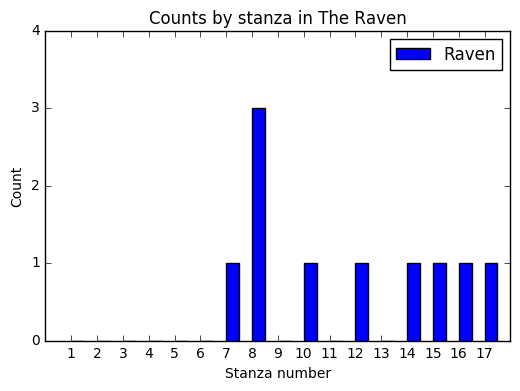

In [23]:
plt.bar(range(1, len(stanzas) + 1), height= raven_data, width=.5)
#plt.bar(range(1, len(stanzas) + 1), height= bird_refs_data, width=.5)
#plt.plot(bird_refs_data)
plt.legend(["Raven", "Bird"])
plt.title("Counts by stanza in The Raven")
plt.xlabel("Stanza number")
plt.ylabel("Count")
plt.xticks(range(1, len(stanzas) + 1))
plt.yticks([0, 1, 2, 3, 4])
plt.show()

In [24]:
import pandas as pd
from ggplot import *
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')

In [25]:
raven_data

[0, 0, 0, 0, 0, 0, 1, 3, 0, 1, 0, 1, 0, 1, 1, 1, 1]

In [26]:
ravendf = pd.DataFrame({'raven': raven_data, 
                        'bird': bird_refs_data, 
                        'nevermore': nevermore_data, 
                        'lenore': lenore_data,
                        'chamber': chamber_data})
ravendf

,bird,chamber,lenore,nevermore,raven
0,0,2,0,0,0
1,0,0,2,0,0
2,0,2,0,0,0
3,0,1,0,0,0
4,0,0,2,0,0
5,0,1,0,0,0
6,0,2,0,0,1
7,1,0,0,1,3
8,2,2,0,1,0
9,1,0,0,1,1


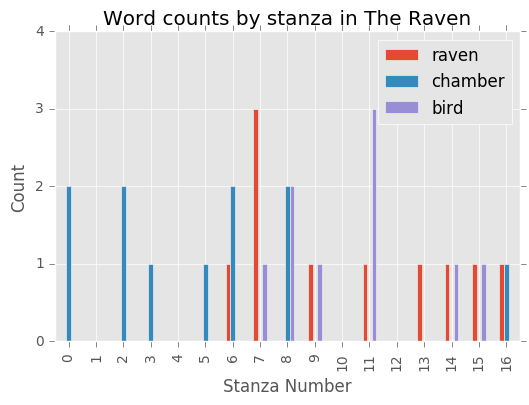

In [27]:
plt = ravendf[['raven', 'chamber', 'bird']].plot.bar(title = "Word counts by stanza in The Raven")
_ = plt.set_xlabel("Stanza Number")
_ = plt.set_ylabel("Count")
_ = plt.set_yticks([0, 1, 2, 3, 4])